# Data Preparation

In [71]:
import requests
import pandas as pd
import os
import seaborn as sns

from acquire import full_dataframe
from acquire import get_germany_wind_solar_data

from sklearn.impute import SimpleImputer

## Preparing store item data

In [28]:
df = full_dataframe()

In [29]:
df.head()

,item,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,level_0,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### 1. Convert date column to datetime format.

In [30]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

In [31]:
df.head()

,item,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,level_0,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,2013-01-01 00:00:00+00:00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,2013-01-02 00:00:00+00:00,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,2013-01-03 00:00:00+00:00,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,2013-01-04 00:00:00+00:00,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,2013-01-05 00:00:00+00:00,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### 2. Plot the distribution of sale_amount and item_price.

In [32]:
sns.set_palette("bright")

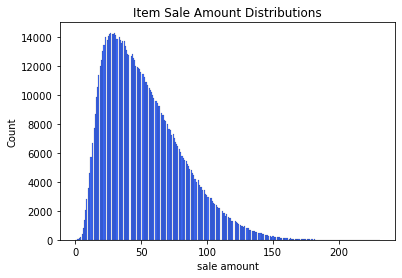

In [33]:
sale_amount_distribution = sns.histplot(data = df, x = "sale_amount")
labels = sale_amount_distribution.set(xlabel = "sale amount", title= "Item Sale Amount Distributions")

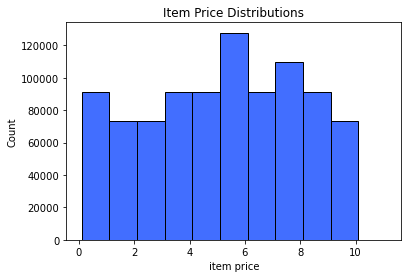

In [37]:
item_price_distribution = sns.histplot(data = df, x = "item_price", discrete = True)
labels = item_price_distribution.set(xlabel = "item price", title= "Item Price Distributions")

### 3. Set the index to be the datetime variable.

In [38]:
# Sort rows by the date and then set the index as that date
df = df.set_index("sale_date").sort_index()

In [39]:
df.head()

,item,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,level_0,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,12,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,46,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,5,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,12,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,12,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### 4. Add a 'month' and 'day of week' column to your dataframe.

In [40]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [41]:
df.head()

,item,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,level_0,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday
2013-01-01 00:00:00+00:00,12,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday
2013-01-01 00:00:00+00:00,46,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,5,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday
2013-01-01 00:00:00+00:00,12,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday
2013-01-01 00:00:00+00:00,12,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [42]:
df['sales_total'] = df['sale_amount'] * df['item_price']

In [43]:
df.head()

,item,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,level_0,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,5,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [47]:
def prepare_store_data(df):
    # Reassign the sale_date column to be a datetime type
    df.sale_date = pd.to_datetime(df.sale_date)
    
    # Sort rows by the date and then set the index as that date
    df = df.set_index("sale_date").sort_index()
    
    #Create month column
    df['month'] = df.index.month_name()

    #Create day column
    df['day_of_week'] = df.index.day_name()
    
    #Create sales_total column
    df['sales_total'] = df['sale_amount'] * df['item_price']
    
    return df

In [45]:
df = full_dataframe()

In [49]:
df = prepare_store_data(df)

In [50]:
df.head()

,item,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,level_0,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,5,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,11,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


## Preparing energy production in Germany data

In [54]:
df = get_germany_wind_solar_data()

In [55]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


### 1. Convert date column to datetime format.

In [56]:
# Reassign the sale_date column to be a datetime type
df.Date = pd.to_datetime(df.Date)

In [57]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


### 2. Plot the distribution of each one of your variables.

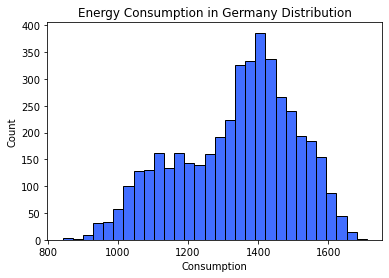

In [59]:
consumption_dist = sns.histplot(x = df.Consumption)
labesl = consumption_dist.set(title = "Energy Consumption in Germany Distribution")

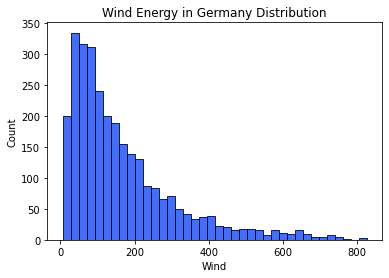

In [62]:
wind_dist = sns.histplot(x = df.Wind)
labels = wind_dist.set(title = "Wind Energy in Germany Distribution")

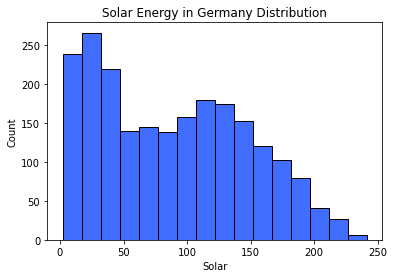

In [63]:
solar_dist = sns.histplot(x = df.Solar)
labels = solar_dist.set(title = "Solar Energy in Germany Distribution")

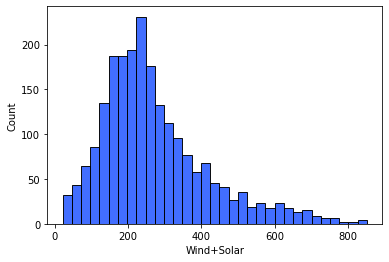

In [64]:
wind_and_solar_dist = sns.histplot(x = df["Wind+Solar"])
labels = solar_dist.set(title = "Wind and Solar Energy in Germany Distribution")

### 3. Set the index to be the datetime variable.

In [65]:
# Sort rows by the date and then set the index as that date
df = df.set_index("Date").sort_index()

In [66]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### 4. Add a month and a year column to your DataFrame.

In [69]:
df['month'] = df.index.month_name()
df['year'] = df.index.year

In [70]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


### 5. Fill any missing values. 

In [74]:
imputer = SimpleImputer(strategy='most_frequent')


#We will create a for loop that will impute all the null values in each one of our columns.
for col in df.columns:
    df[[col]] = imputer.fit_transform(df[[col]])

In [75]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,164.814173,89.258695,272.663481,January,2006
2006-01-02,1380.521,164.814173,89.258695,272.663481,January,2006
2006-01-03,1442.533,164.814173,89.258695,272.663481,January,2006
2006-01-04,1457.217,164.814173,89.258695,272.663481,January,2006
2006-01-05,1477.131,164.814173,89.258695,272.663481,January,2006


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [79]:
def prepare_german_energy_data(df):
    # Reassign the sale_date column to be a datetime type
    df.Date = pd.to_datetime(df.Date)
    
    # Sort rows by the date and then set the index as that date
    df = df.set_index("Date").sort_index()
    
    #Create a month column 
    df['month'] = df.index.month_name()

    #Create a year column
    df['year'] = df.index.year
    
    imputer = SimpleImputer(strategy='most_frequent')

    #We will create a for loop that will impute all the null values in each one of our columns.
    for col in df.columns:
        df[[col]] = imputer.fit_transform(df[[col]])
        
    return df 

In [80]:
df = get_germany_wind_solar_data()

In [81]:
df = prepare_german_energy_data(df)

In [82]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,21.54,40.042,187.626,January,2006
2006-01-02,1380.521,21.54,40.042,187.626,January,2006
2006-01-03,1442.533,21.54,40.042,187.626,January,2006
2006-01-04,1457.217,21.54,40.042,187.626,January,2006
2006-01-05,1477.131,21.54,40.042,187.626,January,2006
